# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm

In [24]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(8, 5)

sns.set()

In [25]:
athletes = pd.read_csv("athletes.csv")

In [16]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [7]:
athletes.shape

(11538, 11)

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [18]:
amostra_3k = get_sample(athletes,'height', n=3000)

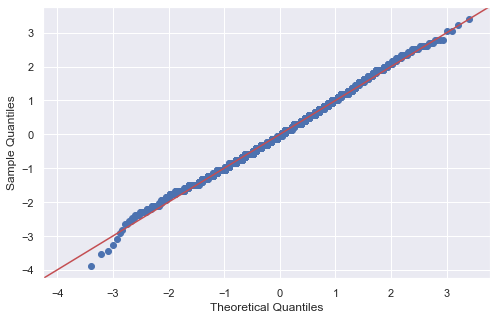

In [26]:
sm.qqplot(amostra_3k, fit=True, line="45");

In [27]:
stat_3k, pvalue_3k = sct.shapiro(amostra_3k)

In [6]:
def q1():
    # Retorne aqui o resultado da questão 1.
    if pvalue_3k > 0.05:
        return True
    else:
        return False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

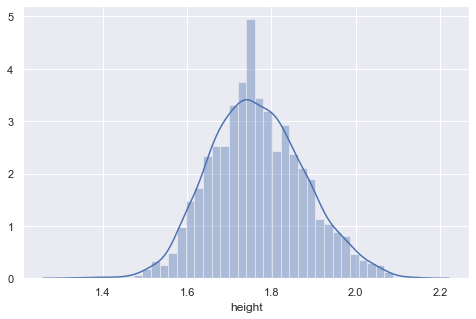

In [28]:
sns.distplot(amostra_3k)

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [31]:
stat_3k_jb , pvalue_3k_jb = sct.jarque_bera(amostra_3k)
(stat_3k_jb , pvalue_3k_jb)

(13.03363513594265, 0.001478366424594868)

In [32]:
def q2():
    # Retorne aqui o resultado da questão 2.
    if pvalue_3k_jb > 0.05:
        return True
    else:
        return False

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [37]:
amostra_3k_w = get_sample(athletes,'weight', n=3000)

In [38]:
stat, p = sct.normaltest(amostra_3k_w)
print('Statistics= %.3f, p= %.3f' % (stat, p))

Statistics= 510.247, p= 0.000


In [39]:
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


In [40]:
def q3():
    # Retorne aqui o resultado da questão 3.
    alpha = 0.05
    if p > alpha:
        return True
    else:
        return False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

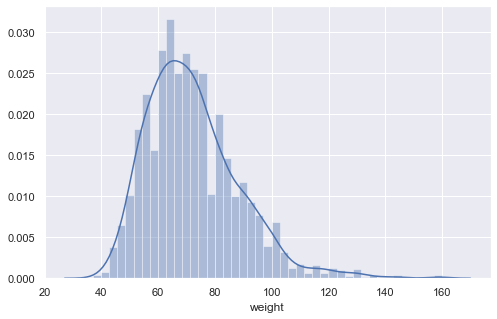

In [41]:
sns.distplot(amostra_3k_w)

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [42]:
amostra_3k_w_log = np.log(amostra_3k_w)

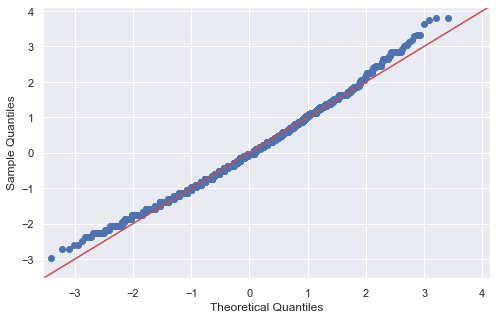

In [45]:
sm.qqplot(amostra_3k_w_log, fit=True, line="45");

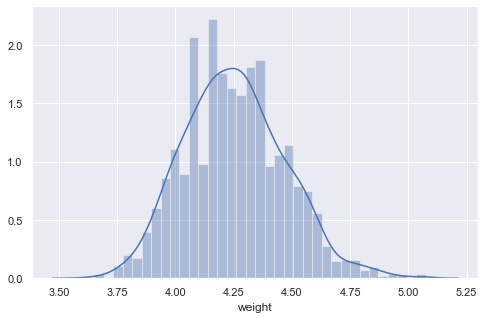

In [46]:
sns.distplot(amostra_3k_w_log)

In [49]:
stat_log, p_log = sct.normaltest(amostra_3k_w_log)

# interpret
alpha = 0.05
if p_log > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


In [50]:
def q4():
    # Retorne aqui o resultado da questão 4.
    alpha = 0.05
    if p_log > alpha:
        return True
    else:
        return False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [120]:
alpha = 0.05

In [122]:
bra = athletes[athletes['nationality'] == 'BRA']['height'].dropna()
can = athletes[athletes['nationality'] == 'CAN']['height'].dropna()
usa = athletes[athletes['nationality'] == 'USA']['height'].dropna()

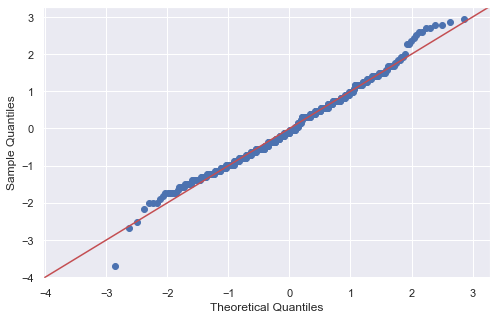

In [124]:
#bra_300 = bra['height'].sample(n=300, random_state=42)
#can_300 = can['height'].sample(n=300, random_state=42)
#usa_300 = usa['height'].sample(n=300, random_state=42)
sm.qqplot(bra, fit=True, line="45");

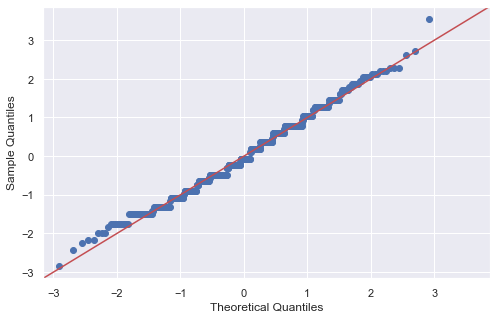

In [125]:
sm.qqplot(usa, fit=True, line="45");

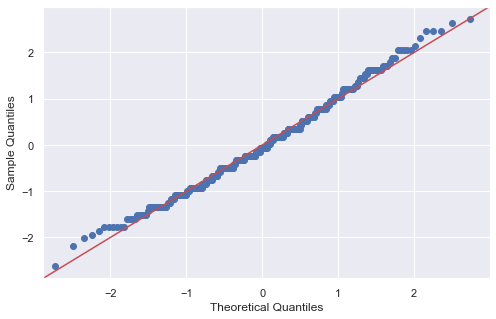

In [126]:
sm.qqplot(can, fit=True, line="45");

In [151]:
ttest_5 = sct.ttest_ind(bra, usa, equal_var = False)

In [152]:
(ttest_5.statistic, ttest_5.pvalue)

(-3.2232436467501553, 0.0013080041830144061)

In [165]:
if ttest_5.pvalue > alpha:
    print('Não rejeita hipótese nula.')
else:
    print('Rejeita hipótese nula.')

Rejeita hipótese nula.


In [154]:
def q5():
    # Retorne aqui o resultado da questão 5.
    if ttest_5.pvalue > alpha:
        return True
    else:
        return False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [155]:
ttest_6 = sct.ttest_ind(bra, can, equal_var = False)

In [156]:
(ttest_6.statistic, ttest_6.pvalue)

(0.638930491436537, 0.5230827295443041)

In [166]:
if ttest_6.pvalue > alpha:
    print('Não rejeita hipótese nula.')
else:
    print('Rejeita hipótese nula.')

Não rejeita hipótese nula.


In [158]:
def q6():
    # Retorne aqui o resultado da questão 6.
    if ttest_6.pvalue > alpha:
        return True
    else:
        return False

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [159]:
ttest_7 = sct.ttest_ind(usa, can, equal_var = False)

In [160]:
(ttest_7.statistic, ttest_7.pvalue)

(3.516987632488539, 0.00046601293473888875)

In [168]:
if ttest_7.pvalue > alpha:
    print('Não rejeita hipótese nula.')
else:
    print('Rejeita hipótese nula.')

Rejeita hipótese nula.


In [169]:
def q7():
    # Retorne aqui o resultado da questão 7.
    return float(round(ttest_7.pvalue, 8))

In [170]:
q7()

0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?